In [2]:
import pytesseract
from matplotlib.image import imread
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import cv2
import random

In [3]:
df = "../image/Train"

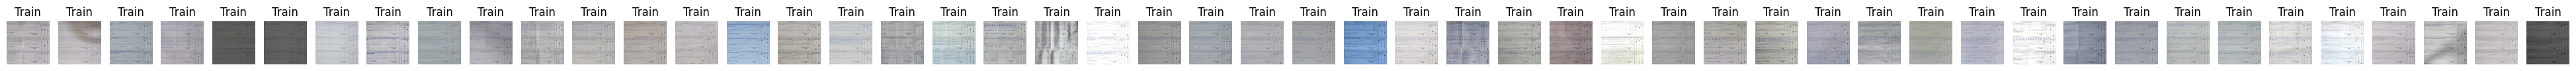

In [4]:
# Get list of all image files
filepaths = []
for root, _, files in os.walk(df):
    for file in files:
        if file.endswith('.jpg'):
            filepaths.append(os.path.join(root, file))

# Choose random images from the dataset
num_samples = 50  # Number of sample images to display
sample_images = random.sample(filepaths, num_samples)

# Display sample images
plt.figure(figsize=(50, 15))
for i, image_path in enumerate(sample_images, 1):
    plt.subplot(1, num_samples, i)
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.title(os.path.basename(os.path.dirname(image_path)))  # Display folder name as title
    plt.axis('off')
plt.show()

Mengubah Ukuran foto

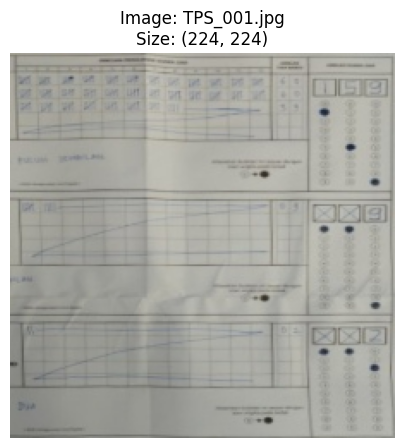

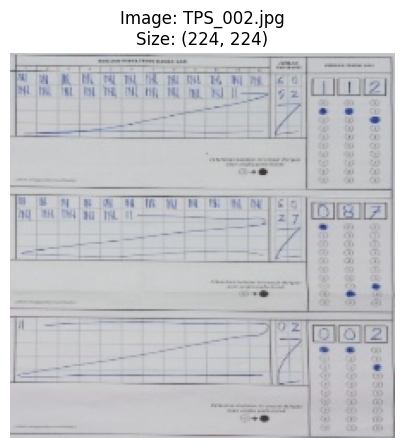

In [5]:
# Target size for resizing
target_size = (224, 224)  # Contoh ukuran yang diinginkan, sesuaikan dengan kebutuhan Anda

# Counter for limiting the number of images displayed
displayed_images = 0

# Loop through all image files in the directory
for filename in os.listdir(df):
    if filename.endswith(".jpg"):
        # Load the image
        image_path = os.path.join(df, filename)
        image = cv2.imread(image_path)
        
        # Resize the image
        resized_image = cv2.resize(image, target_size)
        
        # Show the image and its size
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        plt.title(f"Image: {filename}\nSize: {target_size}")
        plt.axis('off')
        plt.show()
        
        # Increment the counter
        displayed_images += 1
        
        # Check if we have displayed 5 images, if yes, break the loop
        if displayed_images == 2:
            break

Cara mengecek flipping dan mirroring

In [11]:
def check_flipping(original_image, flipped_image, threshold=100):
    # Hitung perbedaan absolut antara dua gambar
    diff = cv2.absdiff(original_image, flipped_image)
    diff_mean = np.mean(diff)

    # Jika perbedaan rata-rata melebihi threshold, maka ada flipping
    if diff_mean > threshold:
        return True
    else:
        return False


df = "../image/Train"
# Daftar semua nama file gambar di folder tersebut
image_files = os.listdir(df)

# Loop melalui setiap file gambar
for image_file in image_files:
    # Baca gambar asli
    original_image_path = os.path.join(df, image_file)
    original_image = cv2.imread(original_image_path)

    # Baca gambar yang sudah dibalik
    flipped_image_path = os.path.join(df, 'TPS_' + image_file)
    flipped_image = cv2.imread(flipped_image_path)

    # Periksa flipping
    is_flipped = check_flipping(original_image, flipped_image)

    if is_flipped:
        print(f"{image_file} mengalami flipping.")
    else:
        print(f"{image_file} tidak mengalami flipping.")


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'
